In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("train.csv")

In [90]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [93]:
df.shape

(1460, 81)

In [94]:
print("Duplicate Rows" , df.duplicated().sum())

Duplicate Rows 0


In [95]:
pd.set_option('display.max_rows',None)
df.isnull().mean().sort_values(ascending=False)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [96]:
## drop cols that have more than 30% missing values 
# PoolQC , MasVnrType, Alley, MasVnrType , FireplaceQu , Fence , MiscFeature
drop_colns = ['PoolQC' ,'Alley' , 'FireplaceQu' , 'Fence' , 'MiscFeature','MasVnrType']  # 'MasVnrType' MasVnrType
df.drop(drop_colns,axis=1,inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [98]:
# fill na columns ['LotFrontage','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

#  Electrical  LotFrontage  GarageYrBlt 
fillna_cols = ['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

for x in fillna_cols : 
    if df[x].dtype !='object':
        med = df[x].median()
        df[x]=df[x].fillna(med)

In [99]:
# #  Electrical  ---> mode

In [100]:
# fill object type na with NULL string
for x in fillna_cols : 
    if df[x].dtype =='object':
        print(x,"\n")
        df[x]=df[x].fillna("NULL")

BsmtQual 

BsmtCond 

BsmtExposure 

BsmtFinType1 

BsmtFinType2 

Electrical 

GarageType 

GarageFinish 

GarageQual 

GarageCond 



In [101]:
#for x in fillna_cols:
  #  print(x)
  #  med = df[x].median()
  #  df[x]=df[x].fillna(med)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [103]:
# drop id column as it is not usefull

df=df.drop('Id',axis='columns')

In [104]:
# overall area

df['Total_area'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

df['Total_area']

0        2416
1        2240
2        2272
3        1933
4        2853
5        2094
6        3063
7        2981
8        1774
9        1928
10       1946
11       3322
12       1649
13       1494
14       1986
15        854
16       1582
17       1296
18       1760
19       1843
20       2376
21       1108
22       1795
23       1900
24       1916
25       1600
26       1620
27       2922
28       2877
29        520
30       1317
31       1228
32       1234
33       2718
34       2714
35       2452
36       1097
37       2510
38       1788
39       1152
40       1967
41       2295
42       1724
43       1709
44       1835
45       2208
46       3500
47       1680
48       1452
49       1718
50       1652
51        816
52       1632
53       3652
54       1744
55       1915
56       2388
57       1720
58       2945
59       1412
60       2099
61       1111
62       1394
63       1710
64       2773
65       2473
66       3119
67       2492
68        747
69       2890
70       4103
71    

In [105]:
# overall bathrooms
df['Overall_Bathrooms'] = df['BsmtFullBath'] + df['BsmtHalfBath']+df['FullBath']+df['HalfBath']
df['Overall_Bathrooms']

0       4
1       3
2       4
3       2
4       4
5       3
6       3
7       4
8       2
9       2
10      2
11      4
12      2
13      2
14      3
15      1
16      2
17      2
18      3
19      1
20      4
21      1
22      2
23      2
24      2
25      2
26      2
27      3
28      2
29      1
30      1
31      2
32      2
33      3
34      3
35      4
36      2
37      2
38      2
39      2
40      2
41      3
42      2
43      2
44      2
45      3
46      3
47      2
48      2
49      2
50      3
51      1
52      2
53      3
54      1
55      2
56      4
57      3
58      4
59      1
60      3
61      1
62      2
63      2
64      4
65      3
66      3
67      3
68      1
69      2
70      3
71      2
72      3
73      2
74      2
75      2
76      1
77      2
78      2
79      2
80      3
81      3
82      2
83      2
84      3
85      3
86      3
87      3
88      1
89      2
90      1
91      1
92      2
93      3
94      4
95      3
96      2
97      2
98      1
99      3


In [106]:
# total porch area
df['Total_Porch'] = df['OpenPorchSF'] + df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['WoodDeckSF']
df['Total_Porch']


0         61
1        298
2         42
3        307
4        276
5        390
6        312
7        667
8        295
9          4
10         0
11       168
12       316
13       193
14       389
15       160
16         0
17         0
18       102
19         0
20       394
21       205
22       330
23       210
24       496
25        56
26       254
27        50
28       546
29       136
30       226
31        65
32        30
33        38
34       250
35       145
36       456
37         0
38        52
39         0
40       138
41       104
42       240
43       145
44         0
45       278
46       409
47       146
48       102
49         0
50        75
51       112
52       106
53       929
54        50
55       407
56       115
57        70
58       229
59       196
60        50
61       144
62       169
63        87
64       612
65       343
66       301
67       173
68         0
69       135
70       300
71         0
72       385
73         0
74       202
75       221
76         0

In [107]:
# drop extra columns  

drop_access_cols = [ 'BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF'] 

df.drop(drop_access_cols,axis=1,inplace=True)

df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
5             50       RL         85.0    14115   Pave      IR1         Lvl   
6             20       RL         75.0    10084   Pave      Reg         Lvl   
7             60       RL         69.0    10382   Pave      IR1         Lvl   
8             50       RM         51.0     6120   Pave      Reg         Lvl   
9            190       RL         50.0     7420   Pave      Reg         Lvl   
10            20       RL         70.0    11200   Pave      Reg         Lvl   
11            60       RL         85.0    11924   Pave      IR1         Lvl   
12            20       RL         69.0    12968   Pave      IR2         Lvl   
13            20       RL         91.0    10652   Pave      IR1         Lvl   
14            20       RL         69.0    10920   Pave      IR1         Lvl   
15            45       RM         51.0     6120   Pave      Reg         Lvl   
16            20       RL         69.0    11241   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
18            20       RL         66.0    13695   Pave      Reg         Lvl   
19            20       RL         70.0     7560   Pave      Reg         Lvl   
20            60       RL        101.0    14215   Pave      IR1         Lvl   
21            45       RM         57.0     7449   Pave      Reg         Bnk   
22            20       RL         75.0     9742   Pave      Reg         Lvl   
23           120       RM         44.0     4224   Pave      Reg         Lvl   
24            20       RL         69.0     8246   Pave      IR1         Lvl   
25            20       RL        110.0    14230   Pave      Reg         Lvl   
26            20       RL         60.0     7200   Pave      Reg         Lvl   
27            20       RL         98.0    11478   Pave      Reg         Lvl   
28            20       RL         47.0    16321   Pave      IR1         Lvl   
29            30       RM         60.0     6324   Pave      IR1         Lvl   
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
31            20       RL         69.0     8544   Pave      IR1         Lvl   
32            20       RL         85.0    11049   Pave      Reg         Lvl   
33            20       RL         70.0    10552   Pave      IR1         Lvl   
34           120       RL         60.0     7313   Pave      Reg         Lvl   
35            60       RL        108.0    13418   Pave      Reg         Lvl   
36            20       RL        112.0    10859   Pave      Reg         Lvl   
37            20       RL         74.0     8532   Pave      Reg         Lvl   
38            20       RL         68.0     7922   Pave      Reg         Lvl   
39            90       RL         65.0     6040   Pave      Reg         Lvl   
40            20       RL         84.0     8658   Pave      Reg         Lvl   
41            20       RL        115.0    16905   Pave      Reg         Lvl   
42            85       RL         69.0     9180   Pave      IR1         Lvl   
43            20       RL         69.0     9200   Pave      IR1         Lvl   
44            20       RL         70.0     7945   Pave      Reg         Lvl   
45           120       RL         61.0     7658   Pave      Reg         Lvl   
46            50       RL         48.0    12822   Pave      IR1         Lvl   
47            20       FV         84.0    11096   Pave      Reg         Lvl   
48           190       RM         33.0     4456   Pave      Reg         Lvl   
49            20       RL         66.0     7742   Pave  

In [108]:
obj_df = [x for x in df.columns if df[x].dtype =='object']


int_df = [x for x in df.columns if df[x].dtype !='object']


In [109]:
df['MSZoning'].nunique()

5

In [110]:
for x in obj_df:
    print(x, df[x].nunique())
    

#df['GarageQual'].nunique()

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6


In [111]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   567.240411  1057.429452  ...   
std      30.202904     20.645407   180.731373   441.866955   438.705324  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000   223.000000   795.750000  ...   
50%    1973.000000   1994.000000     0.000000   477.500000   991.500000  ...   
75%    2000.000000   2004.000000   164.250000   808.000000  1298.250000  ...   
max    2010.000000   2010.000000  1600.000000  2336.000000  6110.000000  ...   

        GarageCars   GarageArea     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      1.767123   472.980137     2.758904     43.489041     6.321918   
std       0.747315   213.804841    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       1.000000   334.500000     0.000000      0.000000     5.000000   
50%       2.000000   480.000000     0.000000      0.000000     6.000000   
75%       2.000000   576.000000     0.000000      0.000000     8.000000   
max       4.000000  1418.000000   738.000000  15500.000000    12.000000   

            YrSold      SalePrice    Total_area  Overall_Bathrooms  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean   2007.815753  180921.195890   1999.808219           2.430822   
std       1.328095   79442.502883    773.992942           0.922647   
min    2006.000000   34900.000000    334.000000           1.000000   
25%    2007.000000  129975.000000   1493.000000           2.000000   
50%    2008.000000  163000.000000   1863.500000           2.000000   
75%    2009.000000  214000.000000   2383.500000           3.000000   
max    2010.000000  755000.000000  11286.000000           6.000000   

       Total_Porch  
count  1460.000000  
mean    181.329452  
std     156.656097  
min       0.000000  
25%      45.000000  
50%     164.000000  
75%     266.000000  
max    1027.000000  

[8 rows x 27 columns]

In [112]:
droplessunique = [] 
for i in df.columns :
    if df[i].value_counts().max() >= 1460*0.90:
        droplessunique.append(i)
print(droplessunique)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [113]:
df.drop(droplessunique, axis=1, inplace=True)

In [114]:
df.shape

(1460, 49)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   object 
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   Neighborhood       1460 non-null   object 
 8   Condition1         1460 non-null   object 
 9   BldgType           1460 non-null   object 
 10  HouseStyle         1460 non-null   object 
 11  OverallQual        1460 non-null   int64  
 12  OverallCond        1460 non-null   int64  
 13  YearBuilt          1460 non-null   int64  
 14  YearRemodAdd       1460 non-null   int64  
 15  RoofStyle          1460 non-null   object 
 16  Exterior1st        1460 

In [116]:
# create new column for house age

df['age'] = df['YrSold'] - df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age']  = df['YrSold'] - df['YearRemodAdd']

drop_col = ['GarageYrBlt','YearRemodAdd']
df.drop(labels = drop_col , axis = 1 , inplace=True)


In [117]:
obj_df = [x for x in df.columns if df[x].dtype =='object']


int_df = [x for x in df.columns if df[x].dtype !='object']

In [118]:
# EDA

In [119]:
df.shape

(1460, 50)

In [120]:
print(obj_df,"\n")
print(len(obj_df))

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition'] 

26


In [121]:
print(int_df,"\n")
print(len(int_df))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice', 'Total_area', 'Overall_Bathrooms', 'Total_Porch', 'age', 'garage_age', 'remodel_age'] 

24


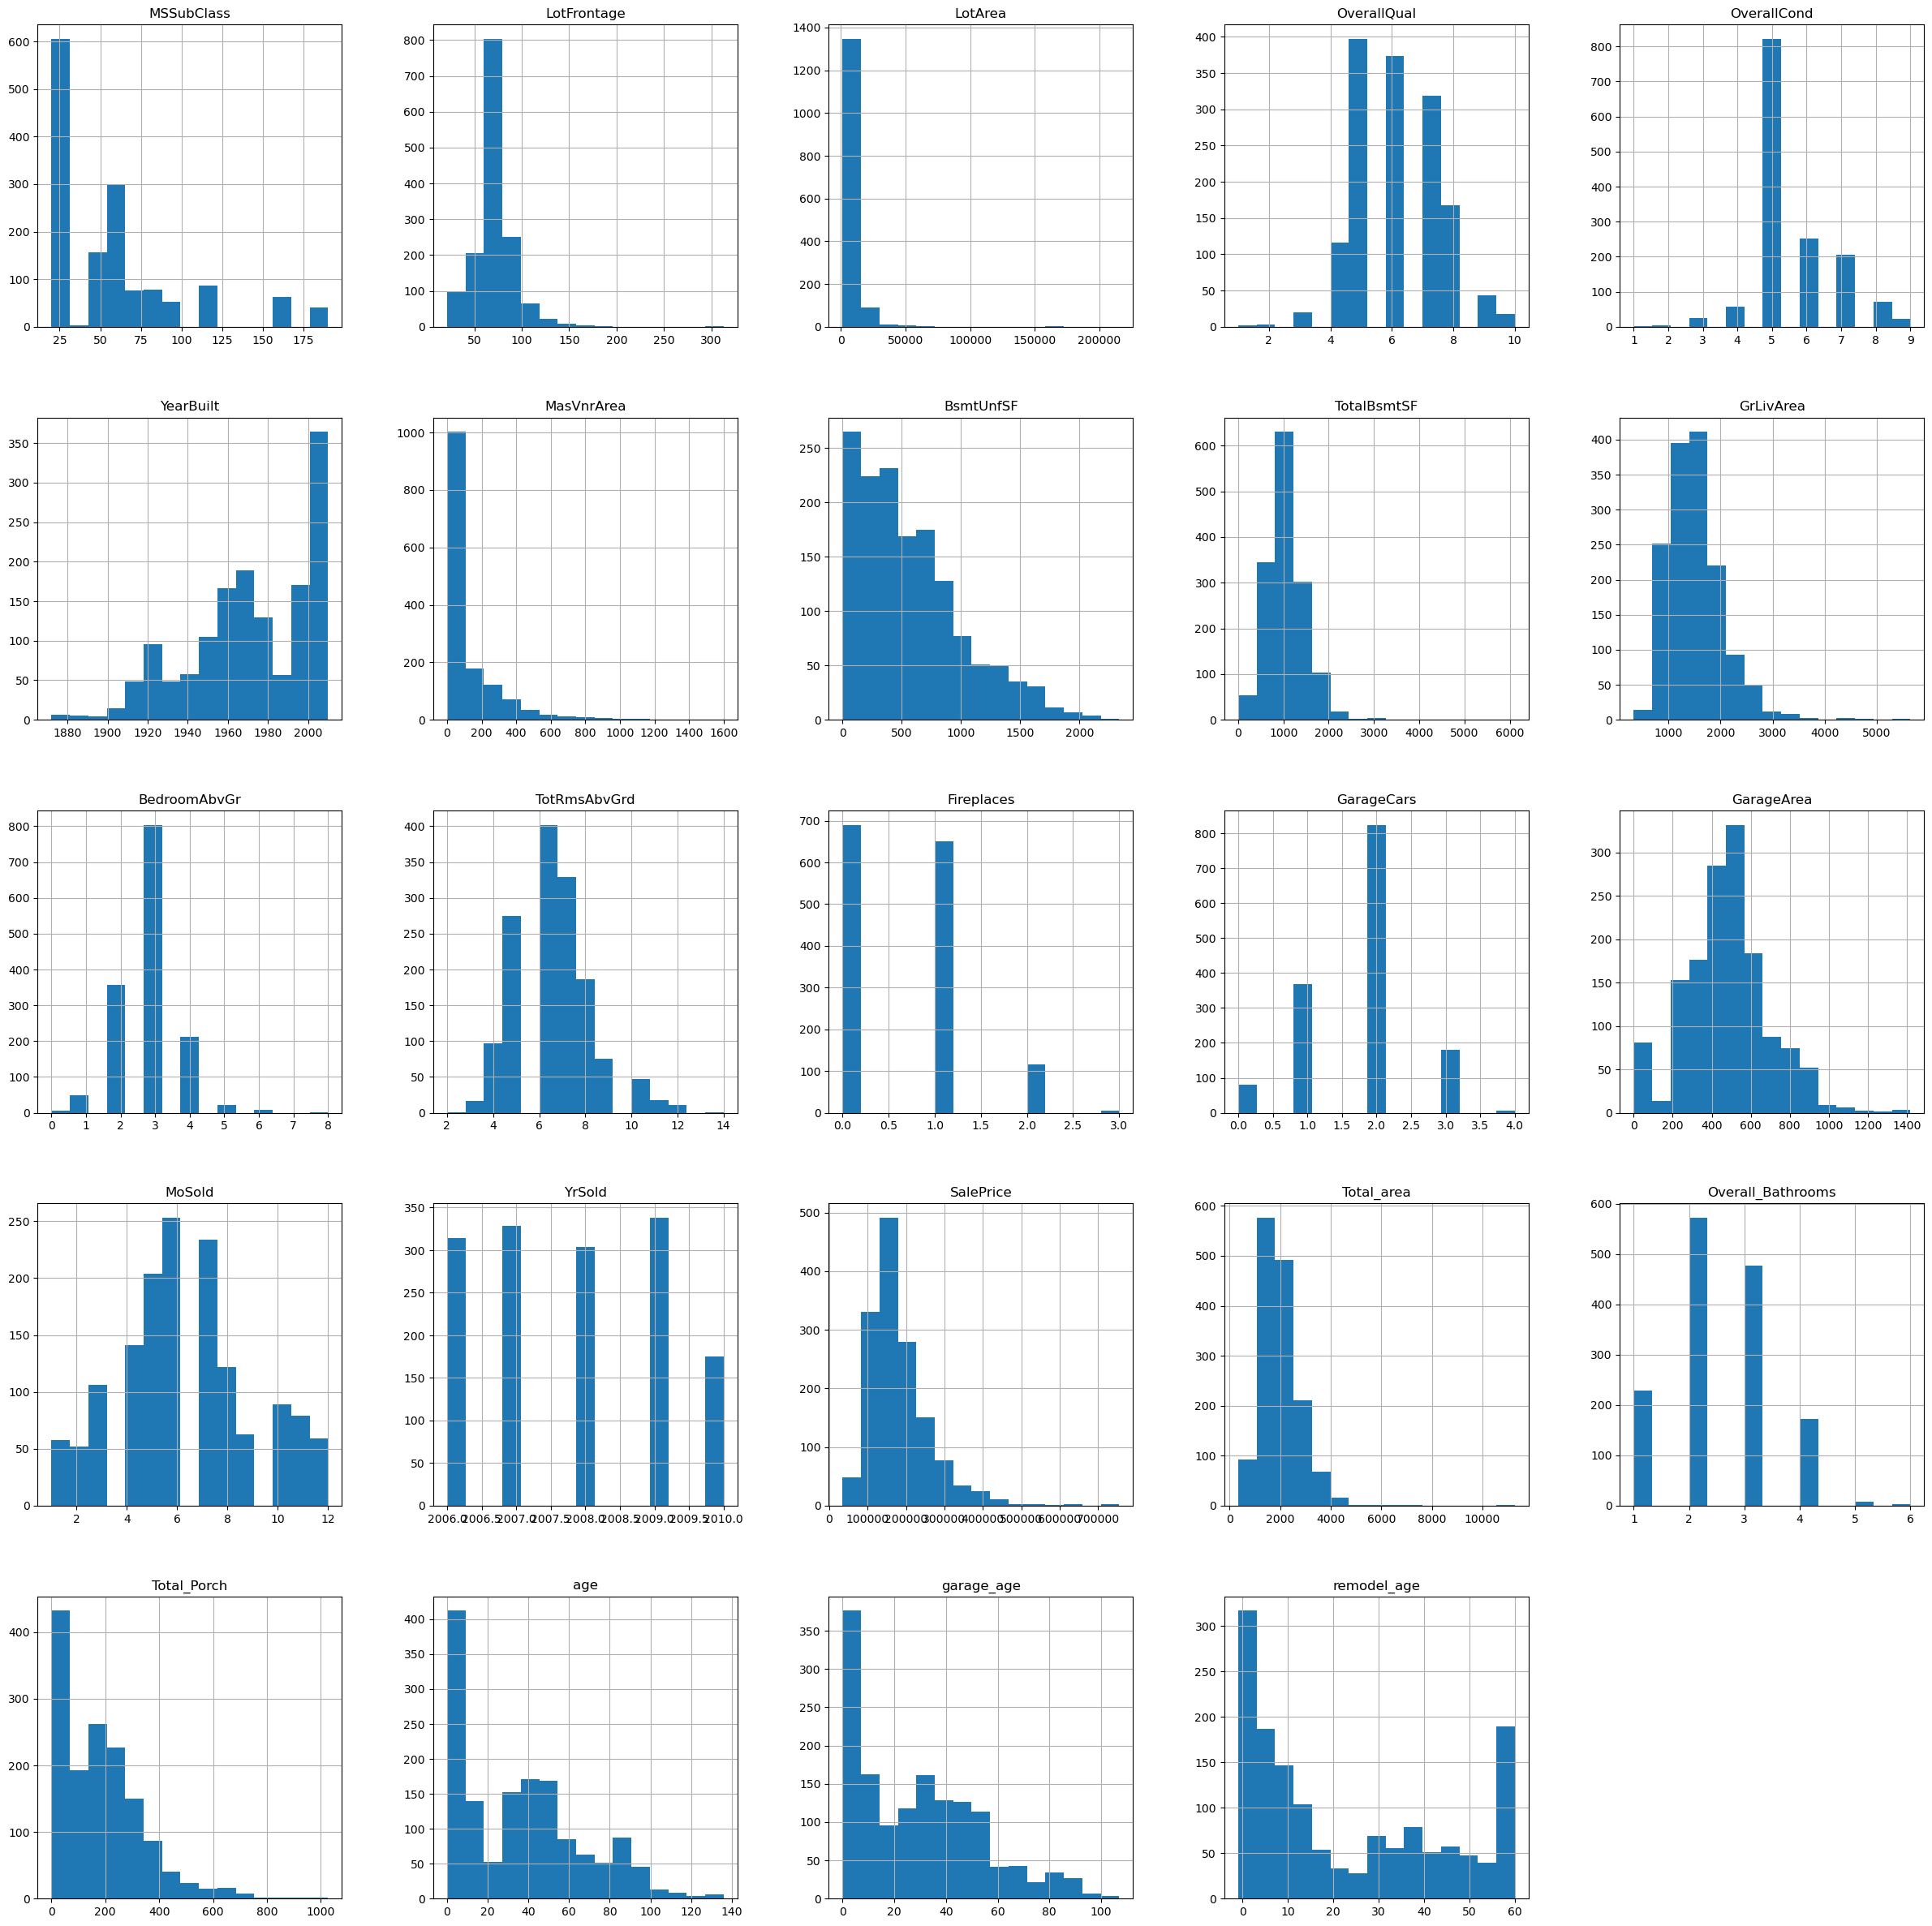

In [122]:
## Univariate Analysis

df[int_df].hist(bins=15, figsize=(30, 30))
plt.show()

In [123]:
cor = df[int_df].corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass           1.000000    -0.356718 -0.139781     0.032628   
LotFrontage         -0.356718     1.000000  0.304522     0.234812   
LotArea             -0.139781     0.304522  1.000000     0.105806   
OverallQual          0.032628     0.234812  0.105806     1.000000   
OverallCond         -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt            0.027850     0.116685  0.014228     0.572323   
MasVnrArea           0.023573     0.178469  0.103321     0.407252   
BsmtUnfSF           -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF         -0.238518     0.363472  0.260833     0.537808   
GrLivArea            0.074853     0.368007  0.263116     0.593007   
BedroomAbvGr        -0.023438     0.236840  0.119690     0.101676   
TotRmsAbvGrd         0.040380     0.320518  0.190015     0.427452   
Fireplaces          -0.045569     0.233221  0.271364     0.396765   
GarageCars          -0.040110     0.269539  0.154871     0.600671   
GarageArea          -0.098672     0.323511  0.180403     0.562022   
MoSold              -0.013585     0.010451  0.001205     0.070815   
YrSold              -0.021407     0.006380 -0.014261    -0.027347   
SalePrice           -0.084284     0.334771  0.263843     0.790982   
Total_area          -0.006936     0.382666  0.327672     0.533425   
Overall_Bathrooms    0.176610     0.182540  0.184407     0.529906   
Total_Porch         -0.034807     0.147397  0.185256     0.306097   
age                 -0.028746    -0.116223 -0.014832    -0.572629   
garage_age          -0.082451    -0.062544  0.025036    -0.514933   
remodel_age         -0.041968    -0.082957 -0.014709    -0.552570   

                   OverallCond  YearBuilt  MasVnrArea  BsmtUnfSF  TotalBsmtSF  \
MSSubClass           -0.059316   0.027850    0.023573  -0.140759    -0.238518   
LotFrontage          -0.053281   0.116685    0.178469   0.124098     0.363472   
LotArea              -0.005636   0.014228    0.103321  -0.002618     0.260833   
OverallQual          -0.091932   0.572323    0.407252   0.308159     0.537808   
OverallCond           1.000000  -0.375983   -0.125694  -0.136841    -0.171098   
YearBuilt            -0.375983   1.000000    0.311600   0.149040     0.391452   
MasVnrArea           -0.125694   0.311600    1.000000   0.113862     0.360067   
BsmtUnfSF            -0.136841   0.149040    0.113862   1.000000     0.415360   
TotalBsmtSF          -0.171098   0.391452    0.360067   0.415360     1.000000   
GrLivArea            -0.079686   0.199010    0.388052   0.240257     0.454868   
BedroomAbvGr          0.012980  -0.070651    0.102775   0.166643     0.050450   
TotRmsAbvGrd         -0.057583   0.095589    0.279568   0.250647     0.285573   
Fireplaces           -0.023820   0.147716    0.247015   0.051575     0.339519   
GarageCars           -0.185758   0.537850    0.361945   0.214175     0.434585   
GarageArea           -0.151521   0.478954    0.370884   0.183303     0.486665   
MoSold               -0.003511   0.012398   -0.006723   0.034888     0.013196   
YrSold                0.043950  -0.013618   -0.008317  -0.041258    -0.014969   
SalePrice            -0.077856   0.522897    0.472614   0.214479     0.613581   
Total_area           -0.074560   0.283450    0.406854  -0.174117     0.640590   
Overall_Bathrooms    -0.149461   0.507498    0.325309  -0.112553     0.339473   
Total_Porch           0.035280   0.096577    0.162687   0.048726     0.290030   
age                   0.377325  -0.999036   -0.311479  -0.150619    -0.391498   
garage_age            0.308222  -0.776711   -0.244519  -0.187598    -0.309726   
remodel_age          -0.070931  -0.593868   -0.177105  -0.183830    -0.292096   

                   GrLivArea  ...  GarageArea    MoSold    YrSold  SalePrice  \
MSSubClass          0.074853  ...   -0.098672 -0.013585 -0.021407  -0.084284   
LotFrontage         0.368007  ...    0.323511  0.010451  0.006380   0.334771   
LotArea             0.26311

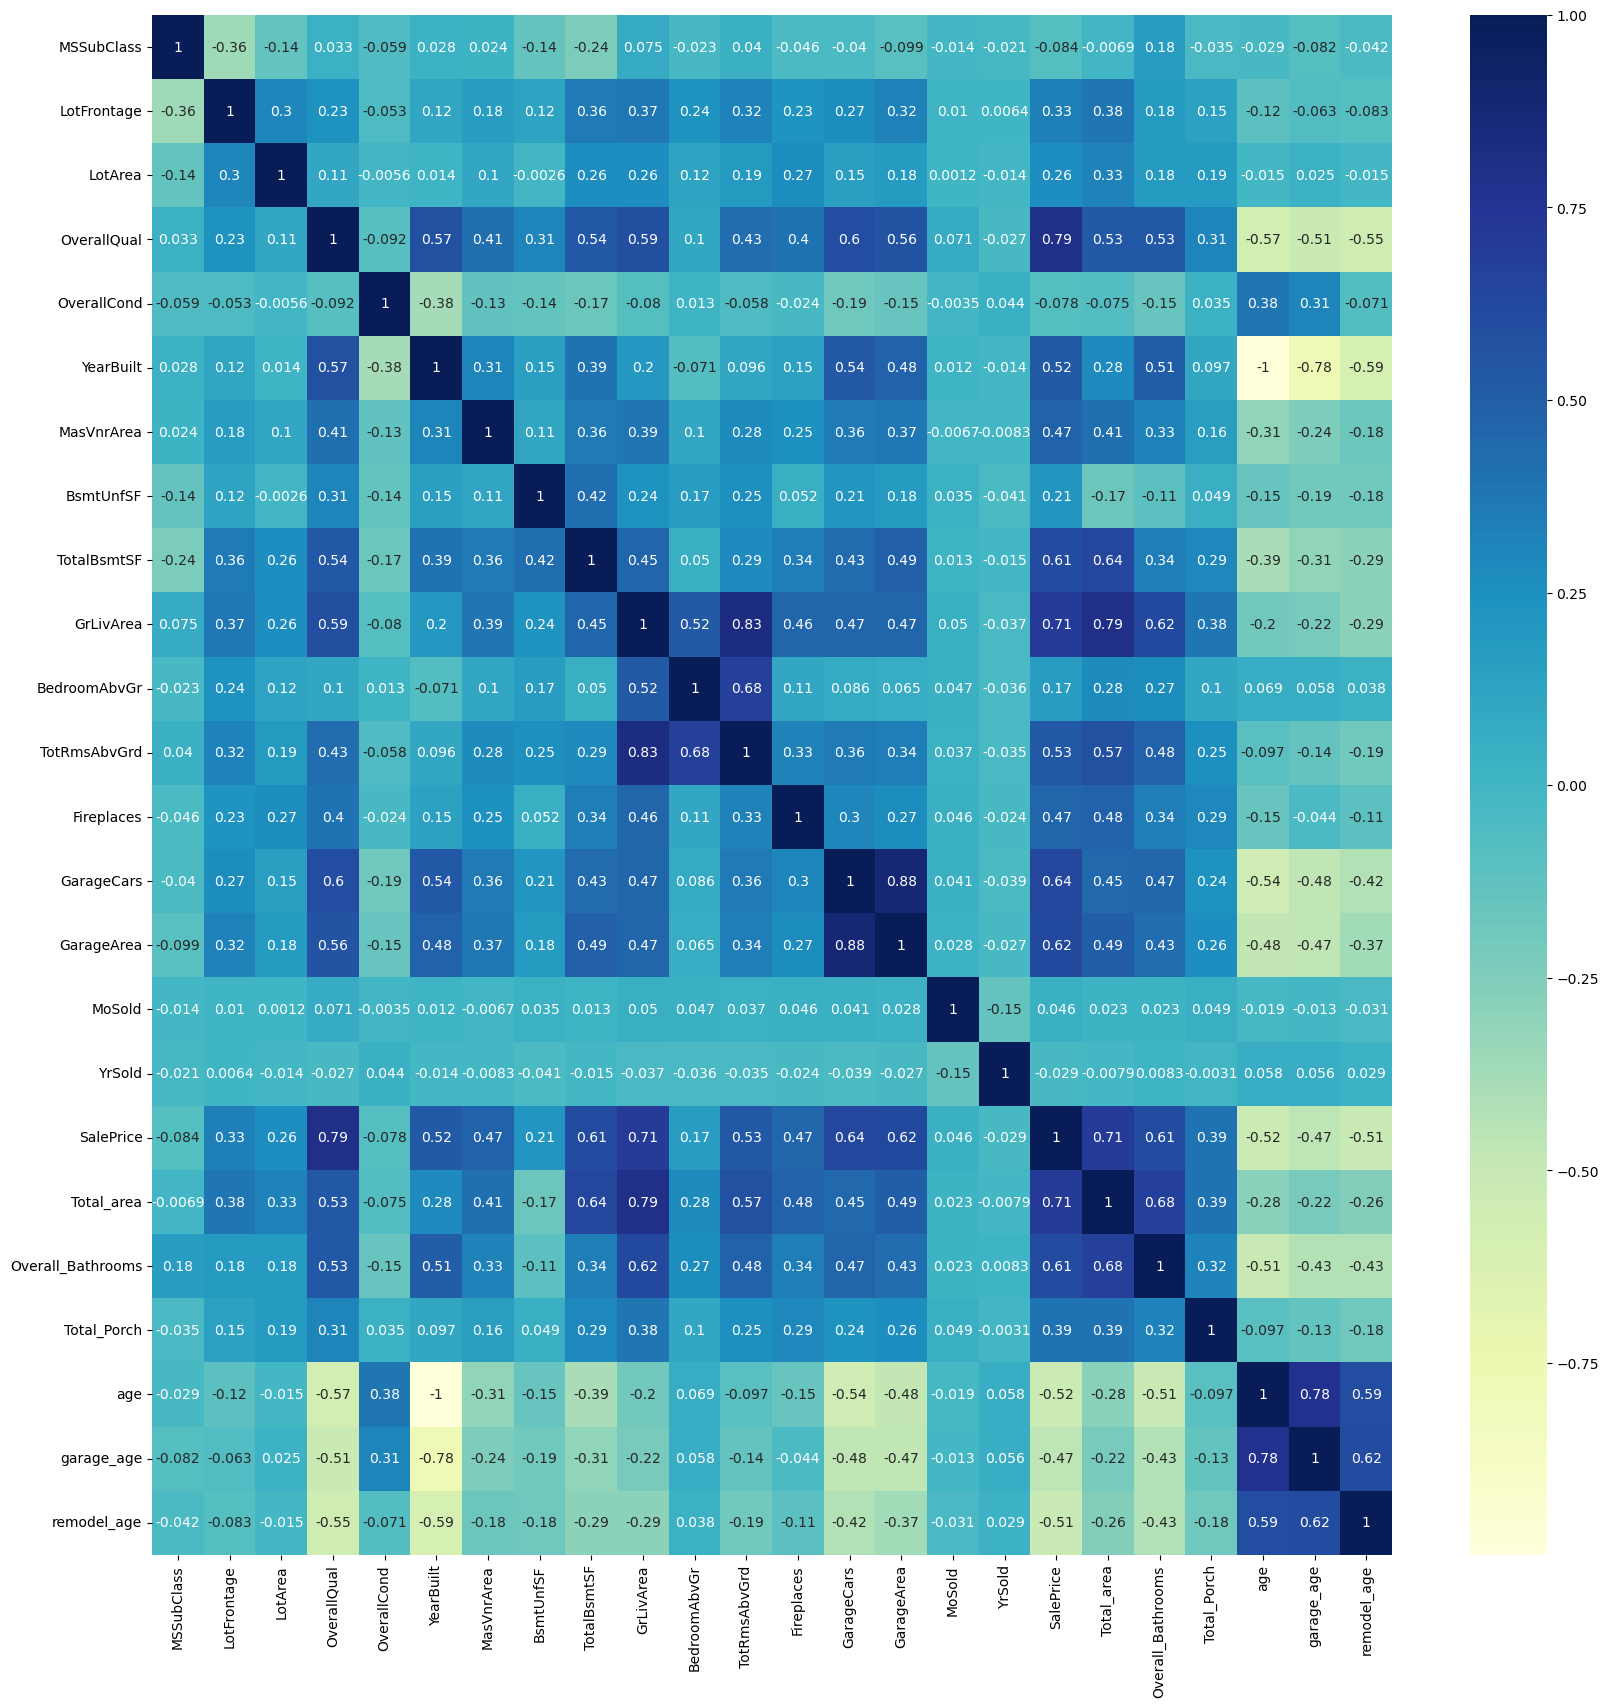

In [124]:
plt.figure(figsize=(20,20))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Sales Price is correlated with following features
Overall Quality, Year Built, TotalBsmtSF, GrLivArea, GarageCars, GarageArea, Total_area, Overall_Bathrooms, 


In [125]:
corr_cols = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'Total_area', 'Overall_Bathrooms' ]

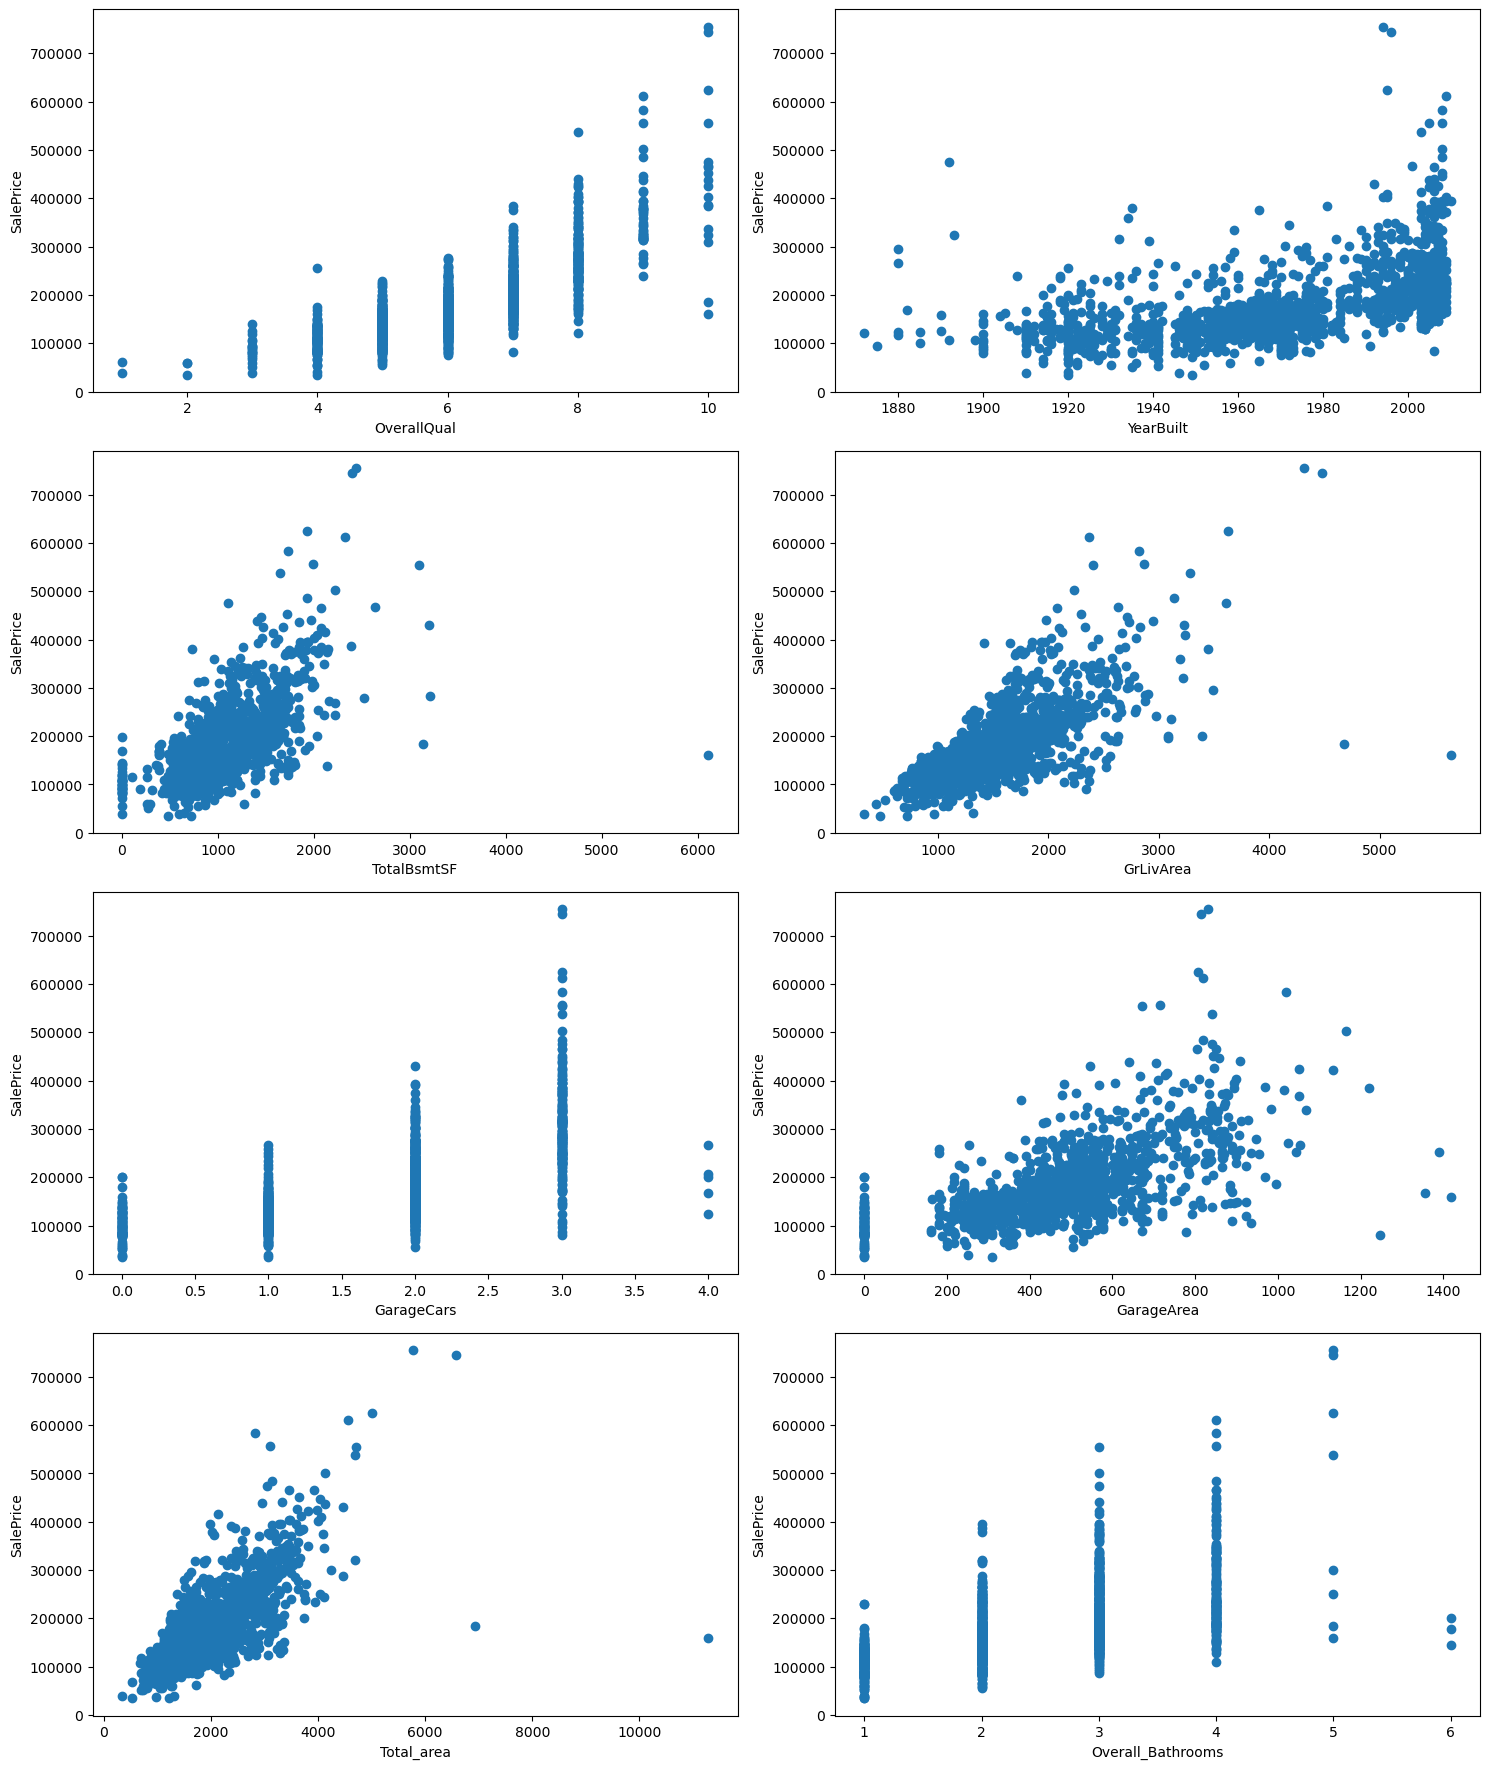

In [126]:
plt.figure(figsize=(15,110))#The size of the plot
c=0
for i in corr_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.scatter(df[i],df['SalePrice'] )
    plt.xlabel(i)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

some variables are not liner correlated with sales price like bathrooms, garagecars, overallqual

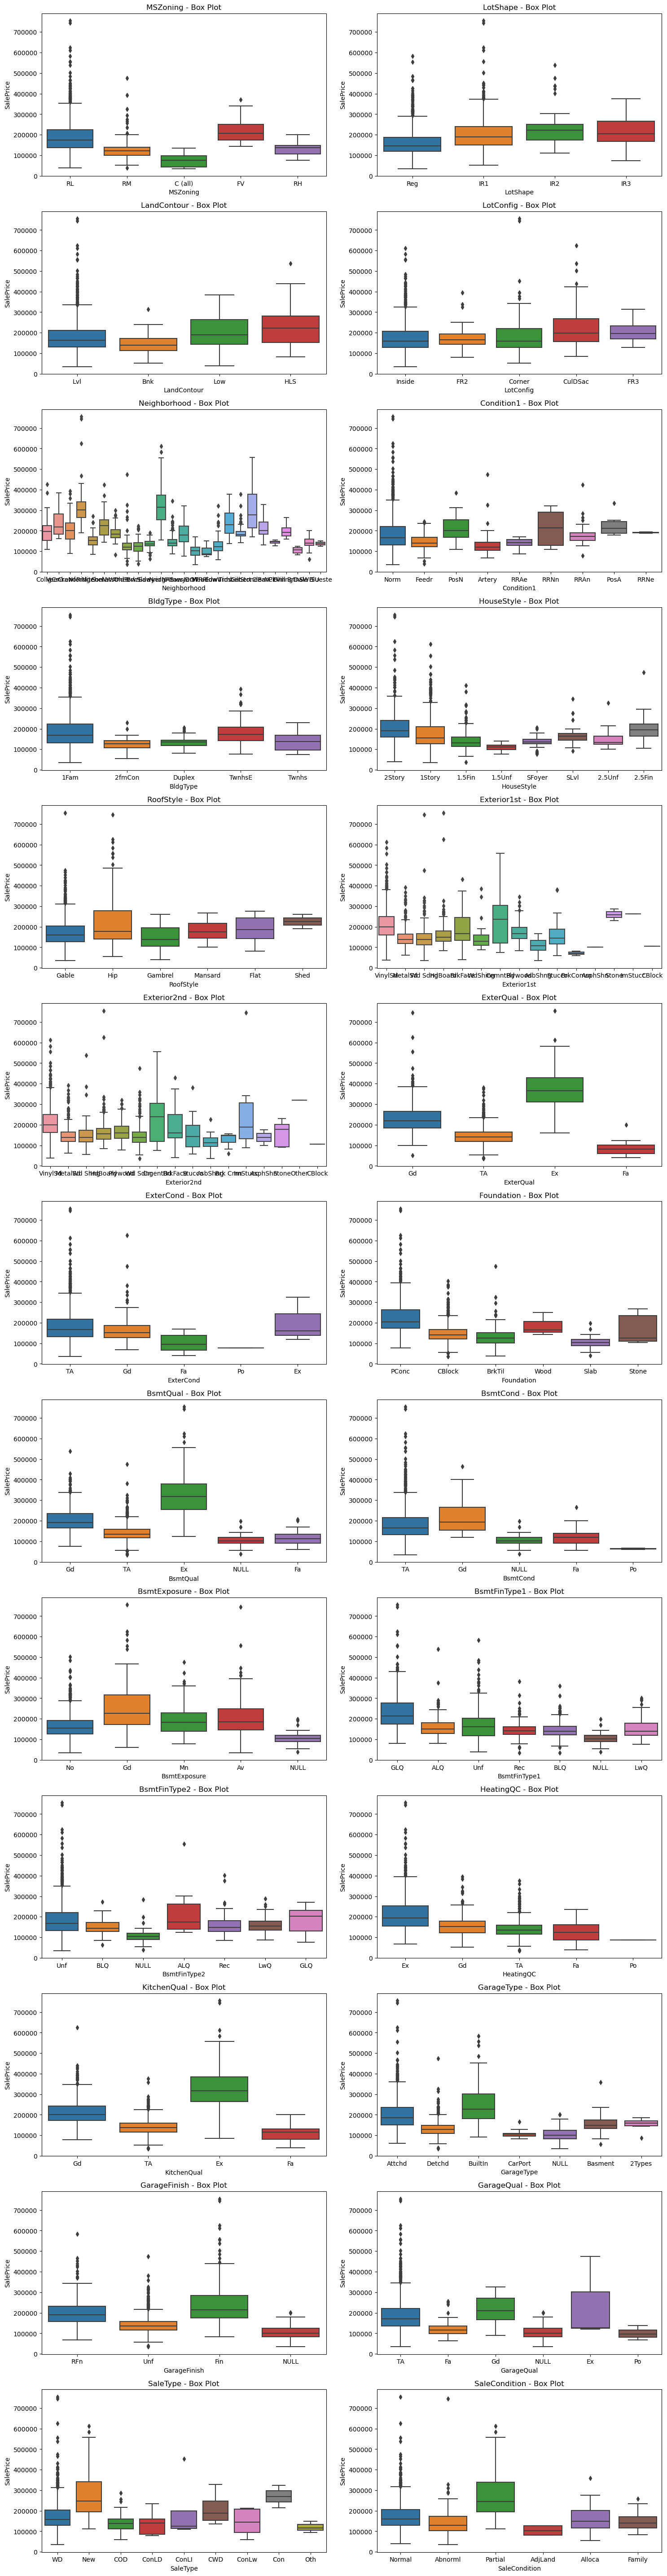

In [127]:
plt.figure(figsize=(15,110))#The size of the plot
c=0
for i in obj_df:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(i+" - Box Plot")
    sns.boxplot(x=i,y="SalePrice",data = df)
    
plt.tight_layout()
plt.show()

Using above box plot we can see that
-> MSZoning with type FV has high sales proce
-. Lotshape IR3 has highest sales, 
garage quality , Kitchen, exterier quality excellent has high sales etc...

In [ ]:
# outliars
#outliar_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtUnfSF','GrLivArea','Total_area','Total_Porch']

#for i in outliar_cols:
#    df = df[df[i]<df[i].quantile(0.98) ]
    

In [129]:
df.shape

(1460, 50)

In [ ]:
## Bivariate analysis

In [ ]:
# analyze relatioship between sakes prie vs continous varuables

## Observations 

##garageagrea and garagecars have strong correlations
##TotRMSAbvGrd and GrLivArea has strong correlations
##Age and Garage age has strong correlations


In [130]:
df[int_df].corr()['SalePrice'].round(decimals = 2).sort_values(ascending=False)

SalePrice            1.00
OverallQual          0.79
GrLivArea            0.71
Total_area           0.71
GarageCars           0.64
GarageArea           0.62
TotalBsmtSF          0.61
Overall_Bathrooms    0.61
TotRmsAbvGrd         0.53
YearBuilt            0.52
MasVnrArea           0.47
Fireplaces           0.47
Total_Porch          0.39
LotFrontage          0.33
LotArea              0.26
BsmtUnfSF            0.21
BedroomAbvGr         0.17
MoSold               0.05
YrSold              -0.03
MSSubClass          -0.08
OverallCond         -0.08
garage_age          -0.47
remodel_age         -0.51
age                 -0.52
Name: SalePrice, dtype: float64

## Slaes price corelated with OverallQual  ,Total_area  ,  GrLivArea, GarageCars               

## Data Preparations


In [131]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 

In [132]:
for x in obj_df:
    df[x] = encoder.fit_transform(df[x]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   int32  
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   int32  
 5   LandContour        1460 non-null   int32  
 6   LotConfig          1460 non-null   int32  
 7   Neighborhood       1460 non-null   int32  
 8   Condition1         1460 non-null   int32  
 9   BldgType           1460 non-null   int32  
 10  HouseStyle         1460 non-null   int32  
 11  OverallQual        1460 non-null   int64  
 12  OverallCond        1460 non-null   int64  
 13  YearBuilt          1460 non-null   int64  
 14  RoofStyle          1460 non-null   int32  
 15  Exterior1st        1460 non-null   int32  
 16  Exterior2nd        1460 

In [133]:
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea     LotShape  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean     56.897260     3.028767    69.863699   10516.828082     1.942466   
std      42.300571     0.632017    22.027677    9981.264932     1.409156   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     3.000000    60.000000    7553.500000     0.000000   
50%      50.000000     3.000000    69.000000    9478.500000     3.000000   
75%      70.000000     3.000000    79.000000   11601.500000     3.000000   
max     190.000000     4.000000   313.000000  215245.000000     3.000000   

       LandContour    LotConfig  Neighborhood   Condition1     BldgType  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      2.777397     3.019178     12.251370     2.031507     0.493151  ...   
std       0.707666     1.622634      6.013735     0.868515     1.198277  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       3.000000     2.000000      7.000000     2.000000     0.000000  ...   
50%       3.000000     4.000000     12.000000     2.000000     0.000000  ...   
75%       3.000000     4.000000     17.000000     2.000000     0.000000  ...   
max       3.000000     4.000000     24.000000     8.000000     4.000000  ...   

            YrSold     SaleType  SaleCondition      SalePrice    Total_area  \
count  1460.000000  1460.000000    1460.000000    1460.000000   1460.000000   
mean   2007.815753     7.513014       3.770548  180921.195890   1999.808219   
std       1.328095     1.552100       1.100854   79442.502883    773.992942   
min    2006.000000     0.000000       0.000000   34900.000000    334.000000   
25%    2007.000000     8.000000       4.000000  129975.000000   1493.000000   
50%    2008.000000     8.000000       4.000000  163000.000000   1863.500000   
75%    2009.000000     8.000000       4.000000  214000.000000   2383.500000   
max    2010.000000     8.000000       5.000000  755000.000000  11286.000000   

       Overall_Bathrooms  Total_Porch          age   garage_age  remodel_age  
count        1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean            2.430822   181.329452    36.547945    29.226712    22.950000  
std             0.922647   156.656097    30.250152    24.034844    20.640653  
min             1.000000     0.000000     0.000000     0.000000    -1.000000  
25%             2.000000    45.000000     8.000000     7.000000     4.000000  
50%             2.000000   164.000000    35.000000    28.000000    14.000000  
75%             3.000000   266.000000    54.000000    46.000000    41.000000  
max             6.000000  1027.000000   136.000000   107.000000    60.000000  

[8 rows x 50 columns]

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

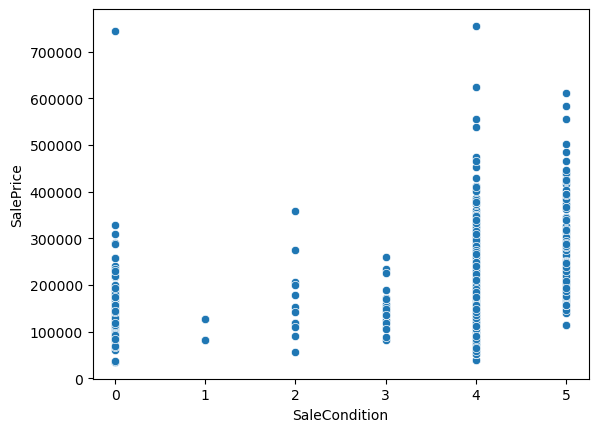

In [134]:
# Ridge regression
sns.scatterplot(data = df, x = 'SaleCondition',  y = 'SalePrice')


In [135]:
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.23529412, 0.75      , 0.15068493, ..., 0.03676471, 0.04672897,
        0.09836066],
       [0.        , 0.75      , 0.20205479, ..., 0.22794118, 0.28971963,
        0.52459016],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.05147059, 0.06542056,
        0.1147541 ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 0.50735294, 0.64485981,
        0.08196721],
       [0.        , 0.75      , 0.1609589 , ..., 0.44117647, 0.56074766,
        0.24590164],
       [0.        , 0.75      , 0.18493151, ..., 0.31617647, 0.40186916,
        0.72131148]])

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

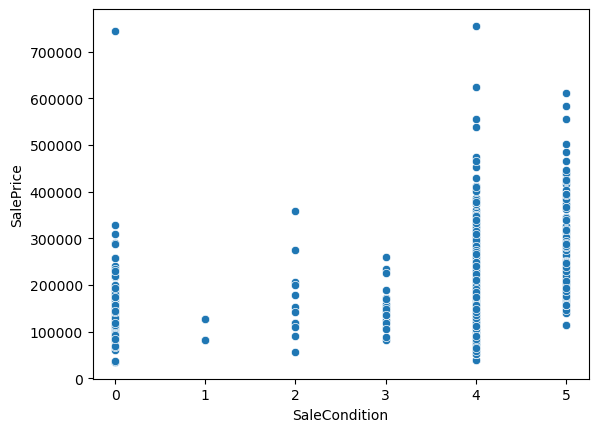

In [136]:
sns.scatterplot(data = df, x = 'SaleCondition',  y = 'SalePrice')


<Axes: xlabel='SaleType', ylabel='SalePrice'>

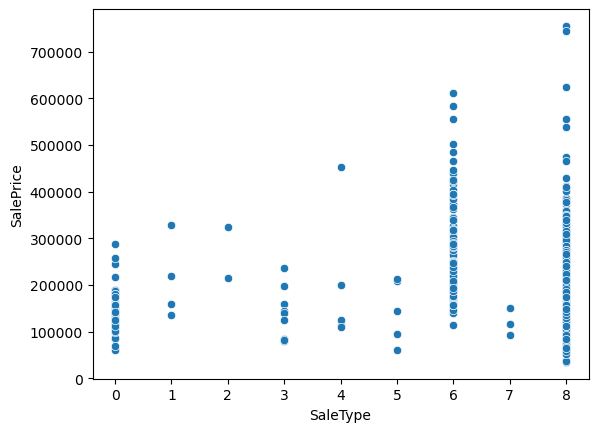

In [137]:
sns.scatterplot(data = df, x = 'SaleType',  y = 'SalePrice')

<Axes: xlabel='Total_area', ylabel='SalePrice'>

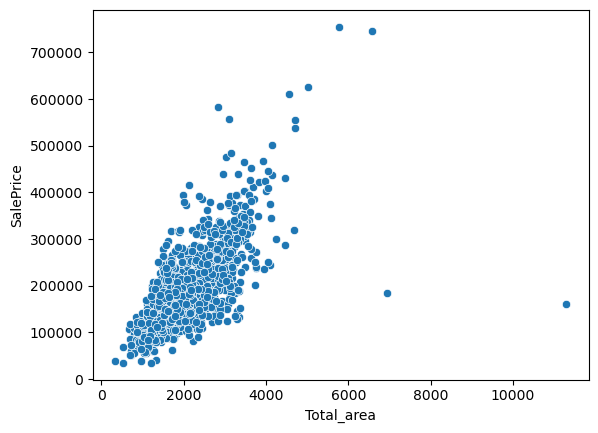

In [138]:
sns.scatterplot(data = df, x = 'Total_area',  y = 'SalePrice')

<Axes: xlabel='Total_Porch', ylabel='SalePrice'>

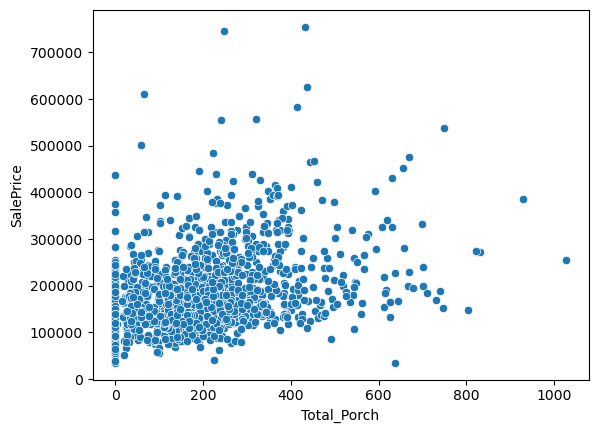

In [139]:
sns.scatterplot(data = df, x = 'Total_Porch',  y = 'SalePrice')

In [140]:
#X = df.iloc[:,1:-1 ]

#y = df['SalePrice'] 

y = df.pop('SalePrice') 
X = df 
print (X)

      MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0             60         3         65.0     8450         3            3   
1             20         3         80.0     9600         3            3   
2             60         3         68.0    11250         0            3   
3             70         3         60.0     9550         0            3   
4             60         3         84.0    14260         0            3   
5             50         3         85.0    14115         0            3   
6             20         3         75.0    10084         3            3   
7             60         3         69.0    10382         0            3   
8             50         4         51.0     6120         3            3   
9            190         3         50.0     7420         3            3   
10            20         3         70.0    11200         3            3   
11            60         3         85.0    11924         0            3   
12            20         

In [141]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [142]:
has_NaN = X.isnull().any().any()
print(has_NaN)

if(has_NaN == True):
    X.fillna(0)
    #df[x]=df[x].fillna(med)

False


In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [234]:
lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [235]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred_train))
print(rss)
mse = mean_squared_error(y_train, y_pred_train)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

1119347413407.0347
1096324596.8727078
33110.79275512303


In [236]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred_test))
print(rss)
mse = mean_squared_error(y_test, y_pred_test)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

452582142950.716
1033292563.8144201
32144.8683900622


In [144]:
lr = LinearRegression()

rfe = RFE(lr,n_features_to_select=94)
rfe = rfe.fit(X_train,y_train)

list( zip(X_train.columns,rfe.support_,rfe.ranking_ ))

[('MSSubClass', True, 1),
 ('MSZoning', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', True, 1),
 ('LandContour', True, 1),
 ('LotConfig', True, 1),
 ('Neighborhood', True, 1),
 ('Condition1', True, 1),
 ('BldgType', True, 1),
 ('HouseStyle', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('RoofStyle', True, 1),
 ('Exterior1st', True, 1),
 ('Exterior2nd', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('Foundation', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinType2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageType', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQu

In [145]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Total_area',
       'Overall_Bathrooms', 'Total_Porch', 'age', 'garage_age', 'remodel_age'],
      dtype='object')

In [146]:
import statsmodels.api as sm 

In [147]:
X_train_rfe = X_train[rfe_cols]
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.shape

(1021, 50)

In [148]:
lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     100.4
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        07:29:17   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     972   BIC:                         2.444e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.569e+06   1.62e+0

In [149]:
vif = pd.DataFrame()

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

Features         VIF
47                age         inf
14          YearBuilt         inf
41             YrSold         inf
0               const  2429765.47
44         Total_area      319.10
30          GrLivArea      142.58
28        TotalBsmtSF      109.96
27          BsmtUnfSF      104.69
38         GarageArea        6.50
37         GarageCars        6.23
17        Exterior2nd        4.95
16        Exterior1st        4.87
33       TotRmsAbvGrd        4.63
1          MSSubClass        4.47
10           BldgType        4.29
48         garage_age        3.56
12        OverallQual        3.49
45  Overall_Bathrooms        3.05
49        remodel_age        2.75
19          ExterQual        2.67
31       BedroomAbvGr        2.62
22           BsmtQual        2.40
21         Foundation        2.04
32        KitchenQual        2.04
11         HouseStyle        2.02
3         LotFrontage        1.86
35         GarageType        1.85
25       BsmtFinType1        1.83
13        OverallCond        1.74
36       GarageFinish        1.71
34         Fireplaces        1.67
29          HeatingQC        1.60
39         GarageQual        1.47
18         MasVnrArea        1.44
24       BsmtExposure        1.37
46        Total_Porch        1.37
2            MSZoning        1.32
4             LotArea        1.32
5            LotShape        1.29
8        Neighborhood        1.24
15          RoofStyle        1.20
20          ExterCond        1.19
43      SaleCondition        1.18
23           BsmtCond        1.17
26       BsmtFinType2        1.17
42           SaleType        1.13
6         LandContour        1.13
7           LotConfig        1.12
9          Condition1        1.08
40             MoSold        1.07

# Linear regression build with 49 featues selected by RFEm Good accuratcy as shown by Adjusted R Squared of 87%''

some features has VIF as infinity which shows high collinearity among predcitors

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   int32  
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   int32  
 5   LandContour        1460 non-null   int32  
 6   LotConfig          1460 non-null   int32  
 7   Neighborhood       1460 non-null   int32  
 8   Condition1         1460 non-null   int32  
 9   BldgType           1460 non-null   int32  
 10  HouseStyle         1460 non-null   int32  
 11  OverallQual        1460 non-null   int64  
 12  OverallCond        1460 non-null   int64  
 13  YearBuilt          1460 non-null   int64  
 14  RoofStyle          1460 non-null   int32  
 15  Exterior1st        1460 non-null   int32  
 16  Exterior2nd        1460 

In [153]:
#Lets extract the numerical columns from the df_train
Num_cols = []
for i in df.columns :
    if df[i].dtype != "uint8":
        Num_cols.append(i)
print("Below are the list of",len(Num_cols) ,"Numerical Columns are :\n")
print(Num_cols)

Below are the list of 49 Numerical Columns are :

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Total_area', 'Overall_Bathrooms', 'Total_Porch', 'age', 'garage_age', 'remodel_age']


In [154]:

Scaler = MinMaxScaler() # Instantiate an object
#Note-The above order of columns in num_cols should be same in df_test, otherwise we will get a wrong r-square value
df[Num_cols] = Scaler.fit_transform(df[Num_cols])

In [155]:

y_test.info()

<class 'pandas.core.series.Series'>
Index: 438 entries, 1436 to 266
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
438 non-null    int64
dtypes: int64(1)
memory usage: 6.8 KB


# Ridge Regression

In [156]:
from sklearn.model_selection import GridSearchCV 

In [225]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8245729114339229


In [226]:
ridge_coef= ridge.coef_

coef_df = pd.DataFrame({'coef': ridge_coef, 'feature': X_train.columns})

coef_df.sort_values(by='coef',ascending=False).head(10)


coef            feature
10  14940.085365        OverallQual
31  12599.320731         GarageCars
29   4978.559518         Fireplaces
38   4919.227419  Overall_Bathrooms
4    4656.995099        LandContour
17   1668.717448         Foundation
37   1562.035243      SaleCondition
11   1456.970152          RoofStyle
18   1448.642140           BsmtCond
21    681.757774       BsmtFinType2

In [215]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8245715166816898


In [224]:
ridge_coef= ridge.coef_

coef_df = pd.DataFrame({'coef': ridge_coef, 'feature': X_train.columns})

coef_df.sort_values(by='coef',ascending=False).head(10)


coef            feature
10  14916.705376        OverallQual
31  12352.834133         GarageCars
29   4973.369641         Fireplaces
38   4902.533500  Overall_Bathrooms
4    4631.371476        LandContour
17   1662.839963         Foundation
37   1560.245922      SaleCondition
11   1459.840409          RoofStyle
18   1442.088418           BsmtCond
21    682.627107       BsmtFinType2

In [160]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0,2.0, 10.0, 50, 100,500, 1000]}
# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 2.0, 10.0, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [161]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005925      0.003009         0.002804        0.001473       0.001   
1       0.006719      0.005098         0.001703        0.001492        0.01   
2       0.003032      0.001260         0.001567        0.000787         0.5   
3       0.003147      0.006294         0.000000        0.000000         1.0   
4       0.003683      0.004179         0.002475        0.003254         2.0   
5       0.001883      0.001402         0.004349        0.005787        10.0   
6       0.000000      0.000000         0.001710        0.003420          50   
7       0.006253      0.007658         0.003125        0.006250         100   
8       0.003127      0.006254         0.002302        0.004603         500   
9       0.003203      0.006406         0.000000        0.000000        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -19828.901689      -23239.200582      -21619.462339   
1   {'alpha': 0.01}      -19828.727403      -23239.121801      -21619.413716   
2    {'alpha': 0.5}      -19819.272454      -23234.847708      -21616.766334   
3    {'alpha': 1.0}      -19809.692364      -23230.516703      -21614.064719   
4    {'alpha': 2.0}      -19790.732818      -23221.945164      -21608.661439   
5   {'alpha': 10.0}      -19650.912114      -23160.703312      -21569.814624   
6     {'alpha': 50}      -19220.476859      -22978.280218      -21418.396340   
7    {'alpha': 100}      -18947.874412      -22923.185008      -21276.065921   
8    {'alpha': 500}      -18293.261841      -23641.020900      -21500.022516   
9   {'alpha': 1000}      -18336.029942      -24395.307296      -22186.258867   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19609.911494  ...    -21059.122790     1317.884372               10   
1      -19609.784509  ...    -21059.009062     1317.915935                9   
2      -19602.895510  ...    -21052.837232     1319.628486                8   
3      -19596.068185  ...    -21046.610184     1321.330654                7   
4      -19582.895413  ...    -21034.342298     1324.626920                6   
5      -19486.874762  ...    -20944.142162     1349.747911                5   
6      -19119.259044  ...    -20627.587984     1446.184850                4   
7      -18809.319264  ...    -20393.194819     1544.352530                2   
8      -18228.190721  ...    -20175.517743     2098.638179                1   
9      -18416.674568  ...    -20586.801686     2358.503704                3   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20601.625930       -17147.836362       -19596.890155   
1       -20601.539553       -17147.788437       -19596.804189   
2       -20596.943413       -17145.184241       -19592.140743   
3       -20592.365365       -17142.537059       -19587.415996   
4       -20583.507355       -17137.273105       -19578.066772   
5       -20519.122254       -17097.903430       -19508.416373   
6       -20295.624951       -16966.130341       -19269.727801   
7       -20132.942267       -16874.693478       -19097.933236   
8       -20047.654434       -17135.138929       -19094.005488   
9       -20606.540421       -17827.603767       -19559.688843   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20173.264561       -19891.946595     -19482.312721      1213.341195  
1       -20173.153904       -19891.851985     -19482.227614      1213.323085  
2       -20167.257325       -19886.719980     -19477.649140      1212.371140  
3       -20161.309870       -19881.521236     -19473.029905      1211.427871  
4       -20149.556065       -19871.281726     -19463.937004      1209.614112  
5       -20062.739292       -19797.422417     -19397.120753      1196.742566  
6       -19764.698421       -19568.650031     -19172.966309      1152.958170  
7       -19554.123758       -19412

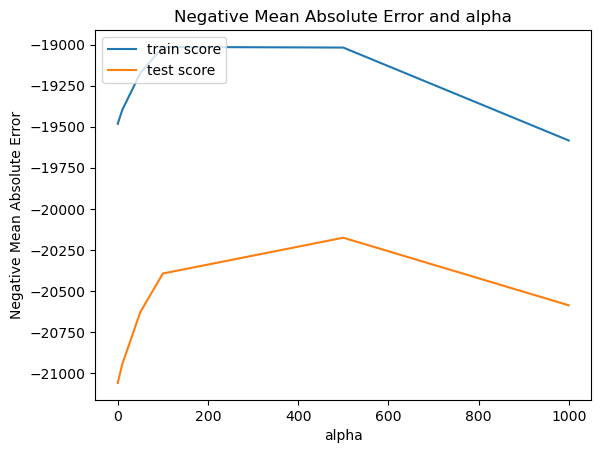

In [162]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [165]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006225      0.000853         0.003518        0.001966       0.001   
1       0.005162      0.005786         0.003520        0.006060        0.01   
2       0.002809      0.005618         0.000000        0.000000         1.0   
3       0.006074      0.007447         0.000261        0.000521         2.0   
4       0.006277      0.007688         0.001061        0.002123         3.0   
5       0.004388      0.004185         0.000719        0.000396         4.0   
6       0.001756      0.001063         0.001000        0.000894         5.0   
7       0.003126      0.006251         0.000000        0.000000         6.0   
8       0.000000      0.000000         0.003203        0.005039         7.0   
9       0.000000      0.000000         0.003133        0.006265         8.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -19828.901689      -23239.200582      -21619.462339   
1   {'alpha': 0.01}      -19828.727403      -23239.121801      -21619.413716   
2    {'alpha': 1.0}      -19809.692364      -23230.516703      -21614.064719   
3    {'alpha': 2.0}      -19790.732818      -23221.945164      -21608.661439   
4    {'alpha': 3.0}      -19772.032943      -23213.491972      -21603.259000   
5    {'alpha': 4.0}      -19753.658703      -23205.154470      -21597.918761   
6    {'alpha': 5.0}      -19735.960783      -23196.930080      -21593.261560   
7    {'alpha': 6.0}      -19718.502496      -23189.336652      -21588.591842   
8    {'alpha': 7.0}      -19701.275874      -23182.027706      -21583.911007   
9    {'alpha': 8.0}      -19684.273345      -23174.820641      -21579.220376   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19609.911494  ...    -21059.122790     1317.884372               13   
1      -19609.784509  ...    -21059.009062     1317.915935               12   
2      -19596.068185  ...    -21046.610184     1321.330654               11   
3      -19582.895413  ...    -21034.342298     1324.626920               10   
4      -19570.339949  ...    -21022.314524     1327.785413                9   
5      -19557.952093  ...    -21010.460387     1330.896412                8   
6      -19545.726737  ...    -20998.971266     1333.948586                7   
7      -19533.659013  ...    -20987.721991     1337.134393                6   
8      -19521.744281  ...    -20976.639775     1340.341596                5   
9      -19509.978115  ...    -20965.684777     1343.512093                4   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20601.625930       -17147.836362       -19596.890155   
1       -20601.539553       -17147.788437       -19596.804189   
2       -20592.365365       -17142.537059       -19587.415996   
3       -20583.507355       -17137.273105       -19578.066772   
4       -20574.957089       -17132.049071       -19568.906510   
5       -20566.556726       -17126.972288       -19559.921803   
6       -20558.252893       -17121.969450       -19551.057790   
7       -20550.174407       -17117.037306       -19542.310518   
8       -20542.180804       -17112.202439       -19533.676232   
9       -20534.351850       -17107.402237       -19525.151355   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20173.264561       -19891.946595     -19482.312721      1213.341195  
1       -20173.153904       -19891.851985     -19482.227614      1213.323085  
2       -20161.309870       -19881.521236     -19473.029905      1211.427871  
3       -20149.556065       -19871.281726     -19463.937004      1209.614112  
4       -20138.037360       -19861.382894     -19455.066585      1207.896242  
5       -20126.788397       -19851.750882     -19446.398019      1206.202380  
6       -20115.714175       -19842.323596     -19437.863581      1204.534773  
7       -20104.780157       -19833

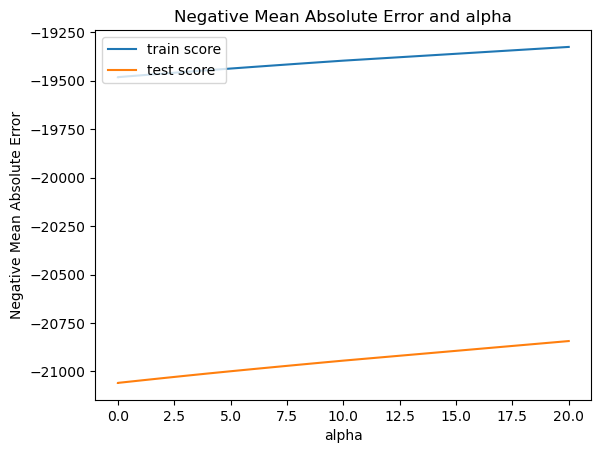

In [167]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [168]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=20)
 The best r2 score is obtained at alpha 20


In [169]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [170]:

#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [171]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

Features   Coefficient           Mod
0     MSSubClass  2.523880e+06  2.523880e+06
12   OverallCond  1.340619e+04  1.340619e+04
37    GarageArea  9.690642e+03  9.690642e+03
32  TotRmsAbvGrd -9.533262e+03  9.533262e+03
19     ExterCond -6.603658e+03  6.603658e+03
22      BsmtCond -5.586875e+03  5.586875e+03
34    GarageType  5.380236e+03  5.380236e+03
45   Total_Porch  4.734990e+03  4.734990e+03
13     YearBuilt  4.508640e+03  4.508640e+03
6      LotConfig  4.306149e+03  4.306149e+03

In [172]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [173]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.832
Ridge regression test r2:  0.8437


# Lasso Regression

In [186]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.058362      0.009539         0.005684        0.005664      0.0001   
1       0.063657      0.005150         0.000000        0.000000       0.001   
2       0.067700      0.006691         0.003629        0.006079        0.01   
3       0.065051      0.007586         0.003125        0.006250        0.05   
4       0.065052      0.008299         0.003945        0.005927         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19817.494559      -23239.121260      -21640.283942   
1   {'alpha': 0.001}      -19817.493194      -23239.119943      -21640.282834   
2    {'alpha': 0.01}      -19817.479543      -23239.106773      -21640.271755   
3    {'alpha': 0.05}      -19817.418869      -23239.048240      -21640.222517   
4     {'alpha': 0.1}      -19817.343027      -23238.975074      -21640.160969   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19610.154586  ...    -21059.616754     1321.811380               26   
1      -19610.153912  ...    -21059.615631     1321.811264               25   
2      -19610.147170  ...    -21059.604406     1321.810111               24   
3      -19610.117203  ...    -21059.554519     1321.804988               23   
4      -19610.079744  ...    -21059.492159     1321.798583               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20600.781557       -17148.647781       -19592.739931   
1       -20600.780775       -17148.647073       -19592.738957   
2       -20600.772959       -17148.639988       -19592.729225   
3       -20600.738217       -17148.608499       -19592.685968   
4       -20600.694789       -17148.569138       -19592.631897   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20176.296832       -19893.730301     -19482.439280      1213.263125  
1       -20176.295636       -19893.729630     -19482.438414      1213.263053  
2       -20176.283676       -19893.722922     -19482.429754      1213.262338  
3       -20176.230518       -19893.693106     -19482.391262      1213.259159  
4       -20176.164072       -19893.655838     -19482.343147      1213.255186  

[5 rows x 21 columns]

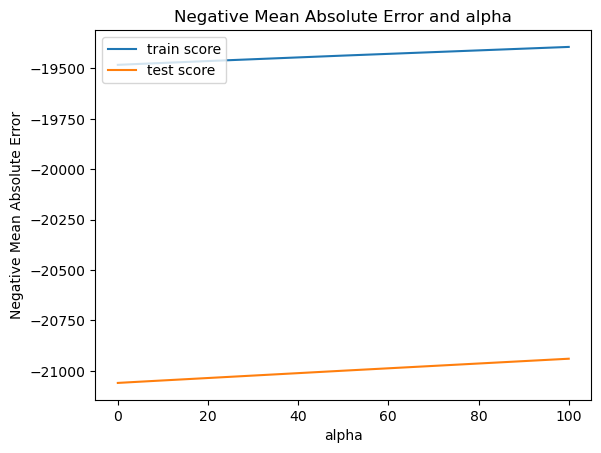

In [188]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [189]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.075214      0.009371         0.000604        0.001207       0.001   
1       0.050951      0.005953         0.003129        0.006259        0.01   
2       0.055182      0.006842         0.001305        0.002610        0.05   
3       0.059316      0.007637         0.000604        0.001207         0.1   
4       0.049999      0.003986         0.003126        0.006251         0.2   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -19817.493194      -23239.119943      -21640.282834   
1   {'alpha': 0.01}      -19817.479543      -23239.106773      -21640.271755   
2   {'alpha': 0.05}      -19817.418869      -23239.048240      -21640.222517   
3    {'alpha': 0.1}      -19817.343027      -23238.975074      -21640.160969   
4    {'alpha': 0.2}      -19817.191343      -23238.828741      -21640.037875   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19610.153912  ...    -21059.615631     1321.811264               13   
1      -19610.147170  ...    -21059.604406     1321.810111               12   
2      -19610.117203  ...    -21059.554519     1321.804988               11   
3      -19610.079744  ...    -21059.492159     1321.798583               10   
4      -19610.004827  ...    -21059.367440     1321.785774                9   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20600.780775       -17148.647073       -19592.738957   
1       -20600.772959       -17148.639988       -19592.729225   
2       -20600.738217       -17148.608499       -19592.685968   
3       -20600.694789       -17148.569138       -19592.631897   
4       -20600.607935       -17148.490416       -19592.523755   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20176.295636       -19893.729630     -19482.438414      1213.263053  
1       -20176.283676       -19893.722922     -19482.429754      1213.262338  
2       -20176.230518       -19893.693106     -19482.391262      1213.259159  
3       -20176.164072       -19893.655838     -19482.343147      1213.255186  
4       -20176.031178       -19893.581300     -19482.246917      1213.247240  

[5 rows x 21 columns]

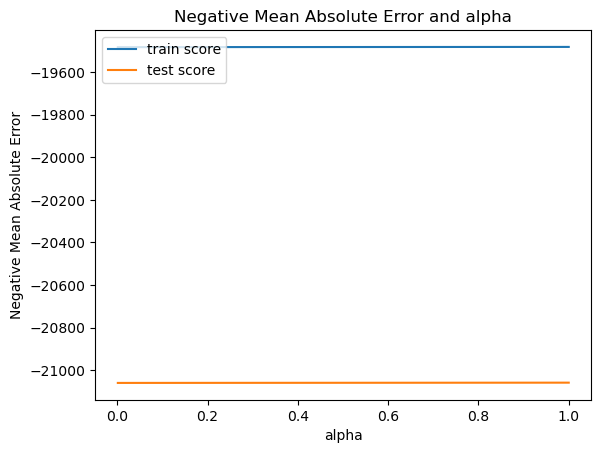

In [191]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [192]:
model_cv.best_params_

{'alpha': 1.0}

In [193]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.079853      0.015120         0.005735        0.006411      0.0001   
1       0.065975      0.006271         0.003125        0.006250       0.001   
2       0.063269      0.006463         0.003732        0.006062        0.01   
3       0.070887      0.006985         0.000403        0.000807        0.05   
4       0.063785      0.001868         0.005318        0.006669         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19817.494559      -23239.121260      -21640.283942   
1   {'alpha': 0.001}      -19817.493194      -23239.119943      -21640.282834   
2    {'alpha': 0.01}      -19817.479543      -23239.106773      -21640.271755   
3    {'alpha': 0.05}      -19817.418869      -23239.048240      -21640.222517   
4     {'alpha': 0.1}      -19817.343027      -23238.975074      -21640.160969   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19610.154586  ...    -21059.616754     1321.811380                5   
1      -19610.153912  ...    -21059.615631     1321.811264                4   
2      -19610.147170  ...    -21059.604406     1321.810111                3   
3      -19610.117203  ...    -21059.554519     1321.804988                2   
4      -19610.079744  ...    -21059.492159     1321.798583                1   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20600.781557       -17148.647781       -19592.739931   
1       -20600.780775       -17148.647073       -19592.738957   
2       -20600.772959       -17148.639988       -19592.729225   
3       -20600.738217       -17148.608499       -19592.685968   
4       -20600.694789       -17148.569138       -19592.631897   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20176.296832       -19893.730301     -19482.439280      1213.263125  
1       -20176.295636       -19893.729630     -19482.438414      1213.263053  
2       -20176.283676       -19893.722922     -19482.429754      1213.262338  
3       -20176.230518       -19893.693106     -19482.391262      1213.259159  
4       -20176.164072       -19893.655838     -19482.343147      1213.255186  

[5 rows x 21 columns]

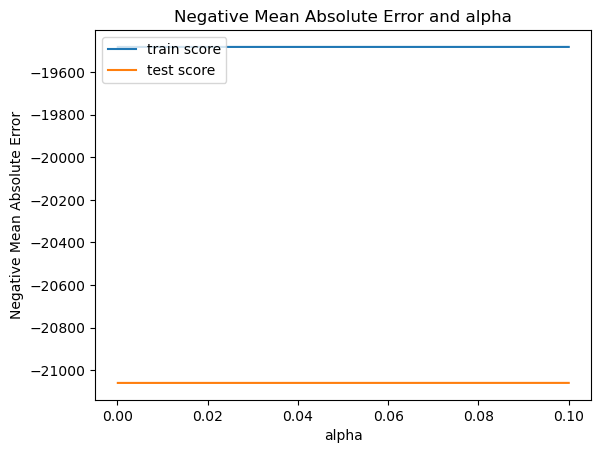

In [195]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [196]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.057381      0.013152         0.001146        0.001407     0.00001   
1       0.050235      0.006344         0.003125        0.006250      0.0001   
2       0.051954      0.006273         0.000000        0.000000       0.001   
3       0.058947      0.008401         0.000305        0.000609        0.01   
4       0.063703      0.007117         0.000406        0.000813        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}      -19817.494696      -23239.121391      -21640.284052   
1  {'alpha': 0.0001}      -19817.494559      -23239.121260      -21640.283942   
2   {'alpha': 0.001}      -19817.493194      -23239.119943      -21640.282834   
3    {'alpha': 0.01}      -19817.479543      -23239.106773      -21640.271755   
4    {'alpha': 0.05}      -19817.418869      -23239.048240      -21640.222517   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19610.154654  ...    -21059.616866     1321.811391                5   
1      -19610.154586  ...    -21059.616754     1321.811380                4   
2      -19610.153912  ...    -21059.615631     1321.811264                3   
3      -19610.147170  ...    -21059.604406     1321.810111                2   
4      -19610.117203  ...    -21059.554519     1321.804988                1   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20600.781635       -17148.647852       -19592.740028   
1       -20600.781557       -17148.647781       -19592.739931   
2       -20600.780775       -17148.647073       -19592.738957   
3       -20600.772959       -17148.639988       -19592.729225   
4       -20600.738217       -17148.608499       -19592.685968   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20176.296952       -19893.730368     -19482.439367      1213.263132  
1       -20176.296832       -19893.730301     -19482.439280      1213.263125  
2       -20176.295636       -19893.729630     -19482.438414      1213.263053  
3       -20176.283676       -19893.722922     -19482.429754      1213.262338  
4       -20176.230518       -19893.693106     -19482.391262      1213.259159  

[5 rows x 21 columns]

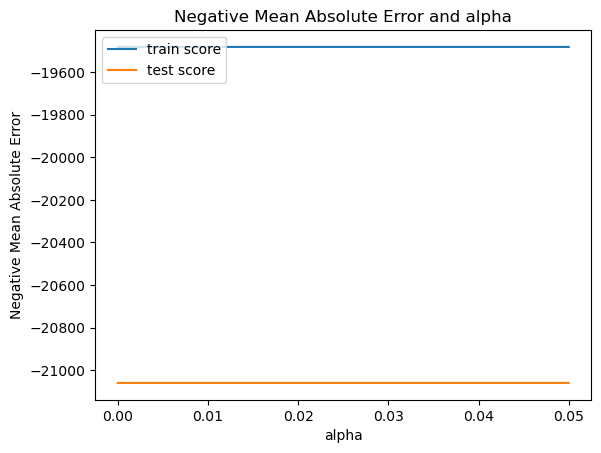

In [198]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [199]:
model_cv.best_params_

{'alpha': 0.05}

In [200]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.084378      0.007469         0.000801        0.001601     0.00001   
1       0.072586      0.007369         0.000000        0.000000      0.0001   
2       0.067183      0.010095         0.003728        0.006067       0.001   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}      -19817.494696      -23239.121391      -21640.284052   
1  {'alpha': 0.0001}      -19817.494559      -23239.121260      -21640.283942   
2   {'alpha': 0.001}      -19817.493194      -23239.119943      -21640.282834   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -19610.154654  ...    -21059.616866     1321.811391                3   
1      -19610.154586  ...    -21059.616754     1321.811380                2   
2      -19610.153912  ...    -21059.615631     1321.811264                1   

   split0_train_score  split1_train_score  split2_train_score  \
0       -20600.781635       -17148.647852       -19592.740028   
1       -20600.781557       -17148.647781       -19592.739931   
2       -20600.780775       -17148.647073       -19592.738957   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -20176.296952       -19893.730368     -19482.439367      1213.263132  
1       -20176.296832       -19893.730301     -19482.439280      1213.263125  
2       -20176.295636       -19893.729630     -19482.438414      1213.263053  

[3 rows x 21 columns]

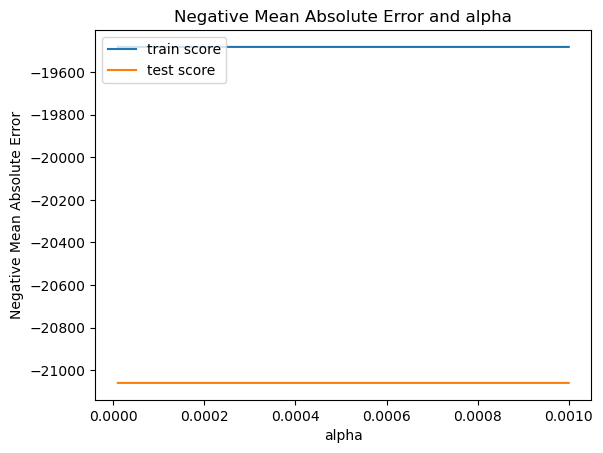

In [202]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [203]:
model_cv.best_params_

{'alpha': 0.001}

# Lasso with optimal values

In [204]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8320894651357567
Lasso Regression test r2: 0.8434738349976736


In [205]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [206]:
lasso_coef

Feature          Coef           mod
0          MSSubClass  2.562271e+06  2.562271e+06
1            MSZoning -1.542278e+02  1.542278e+02
2         LotFrontage -1.676057e+03  1.676057e+03
3             LotArea -1.602540e+02  1.602540e+02
4            LotShape  4.346359e-01  4.346359e-01
5         LandContour -6.229224e+02  6.229224e+02
6           LotConfig  4.561432e+03  4.561432e+03
7        Neighborhood  4.013980e+01  4.013980e+01
8          Condition1  4.115891e+02  4.115891e+02
9            BldgType -9.508887e+01  9.508887e+01
10         HouseStyle -3.076960e+03  3.076960e+03
11        OverallQual -2.197722e+03  2.197722e+03
12        OverallCond  1.360736e+04  1.360736e+04
13          YearBuilt  4.681887e+03  4.681887e+03
14          RoofStyle  1.118307e+03  1.118307e+03
15        Exterior1st  1.139279e+03  1.139279e+03
16        Exterior2nd  2.393754e+02  2.393754e+02
17         MasVnrArea -8.349794e+02  8.349794e+02
18          ExterQual  2.930769e+01  2.930769e+01
19          ExterCond -6.880584e+03  6.880584e+03
20         Foundation  6.236461e+02  6.236461e+02
21           BsmtQual  2.090343e+03  2.090343e+03
22           BsmtCond -5.546648e+03  5.546648e+03
23       BsmtExposure  1.257048e+03  1.257048e+03
24       BsmtFinType1 -4.032781e+03  4.032781e+03
25       BsmtFinType2 -1.533590e+03  1.533590e+03
26          BsmtUnfSF  7.449037e+02  7.449037e+02
27        TotalBsmtSF  2.243829e+01  2.243829e+01
28          HeatingQC -1.655887e+01  1.655887e+01
29          GrLivArea -3.900019e+02  3.900019e+02
30       BedroomAbvGr  1.729940e+01  1.729940e+01
31        KitchenQual -1.534310e+03  1.534310e+03
32       TotRmsAbvGrd -9.817924e+03  9.817924e+03
33         Fireplaces  3.154963e+02  3.154963e+02
34         GarageType  5.540405e+03  5.540405e+03
35       GarageFinish  6.571370e+01  6.571370e+01
36         GarageCars -2.580409e+03  2.580409e+03
37         GarageArea  1.166619e+04  1.166619e+04
38         GarageQual -7.141257e+00  7.141257e+00
39             MoSold  7.354755e+01  7.354755e+01
40             YrSold -1.881656e+02  1.881656e+02
41           SaleType -2.374304e+03  2.374304e+03
42      SaleCondition  3.595247e+02  3.595247e+02
43         Total_area  1.052650e+03  1.052650e+03
44  Overall_Bathrooms  2.700642e+01  2.700642e+01
45        Total_Porch  4.920329e+03  4.920329e+03
46                age  9.112020e+00  9.112020e+00
47         garage_age  1.002142e+03  1.002142e+03
48        remodel_age  1.116928e+01  1.116928e+01

In [207]:
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature          Coef           mod
0     MSSubClass  2.562271e+06  2.562271e+06
12   OverallCond  1.360736e+04  1.360736e+04
37    GarageArea  1.166619e+04  1.166619e+04
32  TotRmsAbvGrd -9.817924e+03  9.817924e+03
19     ExterCond -6.880584e+03  6.880584e+03
22      BsmtCond -5.546648e+03  5.546648e+03
34    GarageType  5.540405e+03  5.540405e+03
45   Total_Porch  4.920329e+03  4.920329e+03
13     YearBuilt  4.681887e+03  4.681887e+03
6      LotConfig  4.561432e+03  4.561432e+03

In [208]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8320894651357567
0.8434738349976736


# Conclusion 

Important features :


OverallCond, MSSubClass , YearBuilt, GarageType, BsmtQual, Total_area

Optimal Value of alpha :

Ridge : 20

Lasso : 0.0001



R2 Value 

Ridge Train r2:  0.83, Test:  0.84

Lasso Train : 0.83, Test : 0.84




# Question 3

In [209]:
drop_cols = ['OverallCond', 'MSSubClass' , 'YearBuilt', 'GarageType', 'BsmtQual', 'Total_area']

In [210]:
X_train.drop(labels = drop_cols, axis = 1, inplace=True)


In [211]:
X_test.drop(labels = drop_cols, axis = 1, inplace=True)

In [212]:
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8245729114342819
0.8394365740019899


In [213]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [214]:
lasso_coef.sort_values(by='mod',ascending=False).head(10)

Feature          Coef           mod
0       MSZoning  2.302743e+06  2.302743e+06
11     RoofStyle  1.494010e+04  1.494010e+04
32    GarageArea  1.259945e+04  1.259945e+04
28  TotRmsAbvGrd -1.016340e+04  1.016340e+04
16     ExterCond -8.092778e+03  8.092778e+03
9     HouseStyle -7.474450e+03  7.474450e+03
30  GarageFinish  4.978562e+03  4.978562e+03
39   Total_Porch  4.919235e+03  4.919235e+03
5      LotConfig  4.657008e+03  4.657008e+03
20  BsmtFinType1 -4.026339e+03  4.026339e+03